# Certified Data Analyst Professional
## Practical Exam - Travel Insurance

I will attempt to answer the business question through the data which are:
the Customer want to know:
1. Are there differences in the travel habits between customers and non-customers?
2. What is the typical profile of customers and non-customers?

as well as provide some suggestion to help improve the business based on the insights found in the dataset


In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dexplot as dxp

#set pandas max column
pd.set_option('display.max_columns', None)

# import the CSV file into df 
df=pd.read_csv('travel_insurance.csv')

In [7]:
#display the deails of the data
print(df.info())

#display the first 5 rows 
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB
None
   Age               Employment Type GraduateOrNot  AnnualIncome  \
0   31             Government Sector           Yes        400000   
1   31  Private Sector/Self Employed           Yes       1250000   
2   34  Private Sector/Self Employed           Yes        500000   
3   28  Private Sector/Sel

In [11]:
#changing the columns name to match the best practice

df.rename(columns = {'Age':'age',
                     'Employment Type':'employment_type',
                     'GraduateOrNot':'graduate',
                     'AnnualIncome':'annual_income',
                     'FamilyMembers':'family_members',
                     'ChronicDiseases':'chronic_diseases',
                     'FrequentFlyer':'frequent_flyer',
                     'EverTravelledAbroad':'ever_travelled_abroad',
                     'TravelInsurance':'travel_insurance'},
          inplace = True)

In [12]:
#expolring the unique values and their distribution

for col in df.columns:
    print('Coulmn name: ',col)
    print(col, 'unique values are ',df[col].unique())
    print(df[col].value_counts(dropna=False))
    print('********************')

Coulmn name:  age
age unique values are  [31 34 28 25 33 26 32 29 35 30 27]
28    506
34    266
31    234
29    192
33    148
26    148
25    146
27    131
32     91
30     65
35     60
Name: age, dtype: int64
********************
Coulmn name:  employment_type
employment_type unique values are  ['Government Sector' 'Private Sector/Self Employed']
Private Sector/Self Employed    1417
Government Sector                570
Name: employment_type, dtype: int64
********************
Coulmn name:  graduate
graduate unique values are  ['Yes' 'No']
Yes    1692
No      295
Name: graduate, dtype: int64
********************
Coulmn name:  annual_income
annual_income unique values are  [ 400000 1250000  500000  700000 1150000 1300000 1350000 1450000  800000
 1400000  850000 1500000 1050000  350000 1100000  600000  900000  550000
  300000  750000 1200000 1000000  950000 1700000 1750000  650000  450000
 1650000 1800000 1550000]
800000     153
500000     143
1400000    130
1200000    112
1100000    107
6

In [13]:
# check for missing values
df.isnull().sum()

age                      0
employment_type          0
graduate                 0
annual_income            0
family_members           0
chronic_diseases         0
frequent_flyer           0
ever_travelled_abroad    0
travel_insurance         0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


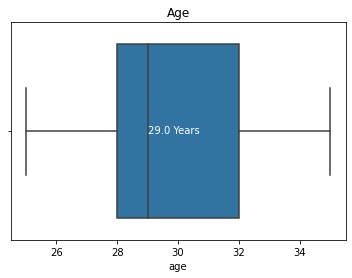

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


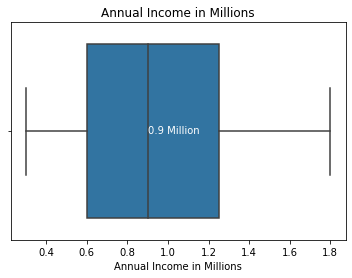

In [15]:
#checking for outliers in age and annual_income using boxplots
#checking age and age outliers using boxplot
box_plot=sns.boxplot(df.age);
age_median=df.age.median()
plt.title('Age')
box_plot.text(age_median,0.01,str(age_median)+' Years', fontsize=10,color='w')
plt.show()

#checking annual_income and age outliers using boxplot
box_plot=sns.boxplot(df.annual_income/1000000);
income_median=df.annual_income.median()/1000000
plt.title('Annual Income in Millions')
plt.xlabel('Annual Income in Millions')
box_plot.text(income_median,0.01,str(income_median)+' Million', fontsize=10,color='w')
plt.show()

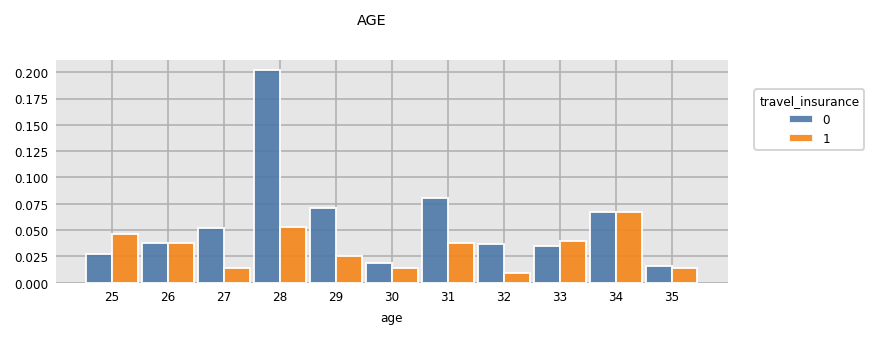

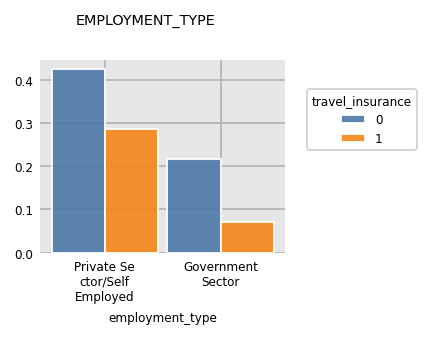

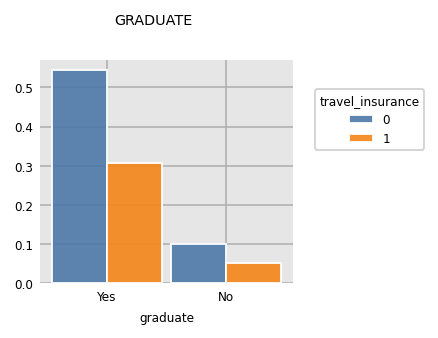

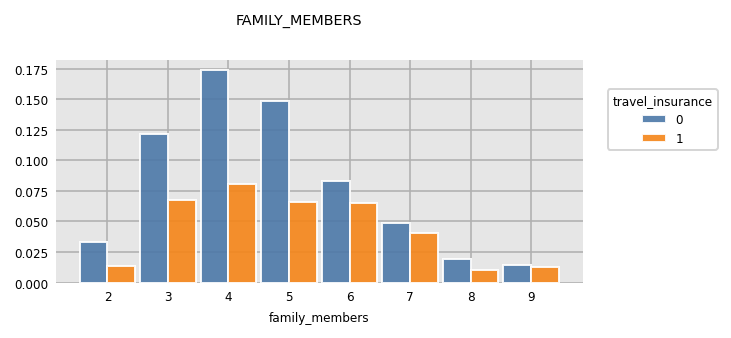

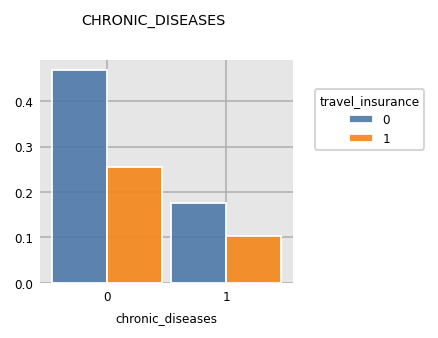

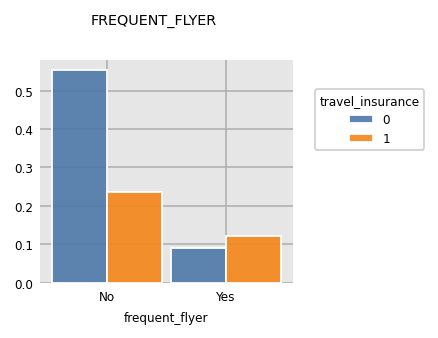

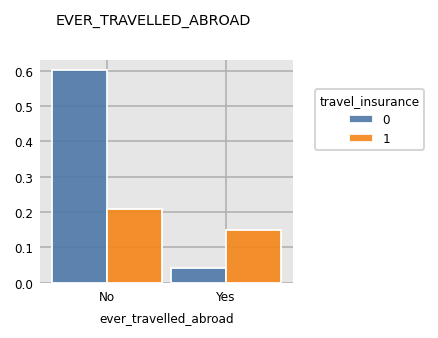

In [21]:
#plot the percentage of customers and non customers per column
for col in ['age', 'employment_type', 'graduate',  'family_members',
       'chronic_diseases', 'frequent_flyer', 'ever_travelled_abroad' ]:
    x=dxp.count(col, data=df,split='travel_insurance',normalize=True, title=col.upper())
    display(x)

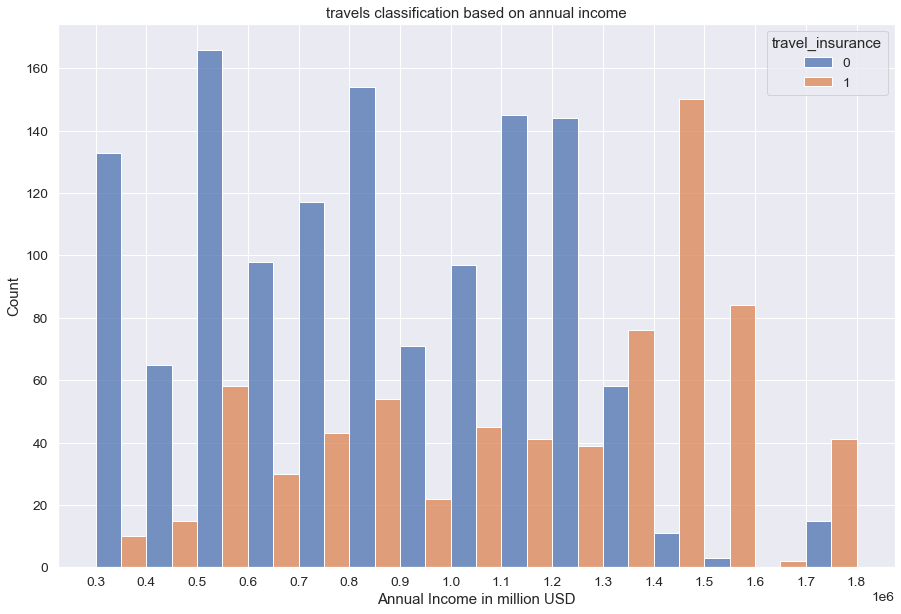

In [109]:
#exporing the annual income
plt.figure(figsize=(15,10))
sns.histplot(data=df, x="annual_income", bins=15,hue='travel_insurance', multiple="dodge")
plt.xticks(np.arange(df.annual_income.min(),df.annual_income.max()+100000,100000))
plt.xlabel('Annual Income in million USD')
plt.title('travels classification based on annual income');

### cassifying the annual_incomeand family_member into into smaller number of groups might help
1. annaul_income classification:
- clients with income more than 1.35M >> high 
- clients with income between 0.9M and 1.35M >> middle
- clients with income less than 0.9M >> low

2. family_member classification:
- family with 8 or 9 members >> huge
- family with 6 or 7 members >> large
- family with 4 or 5 members >> mid
- family with 2 or 3 members >> small

Text(0.5, 1.0, 'Income class ')

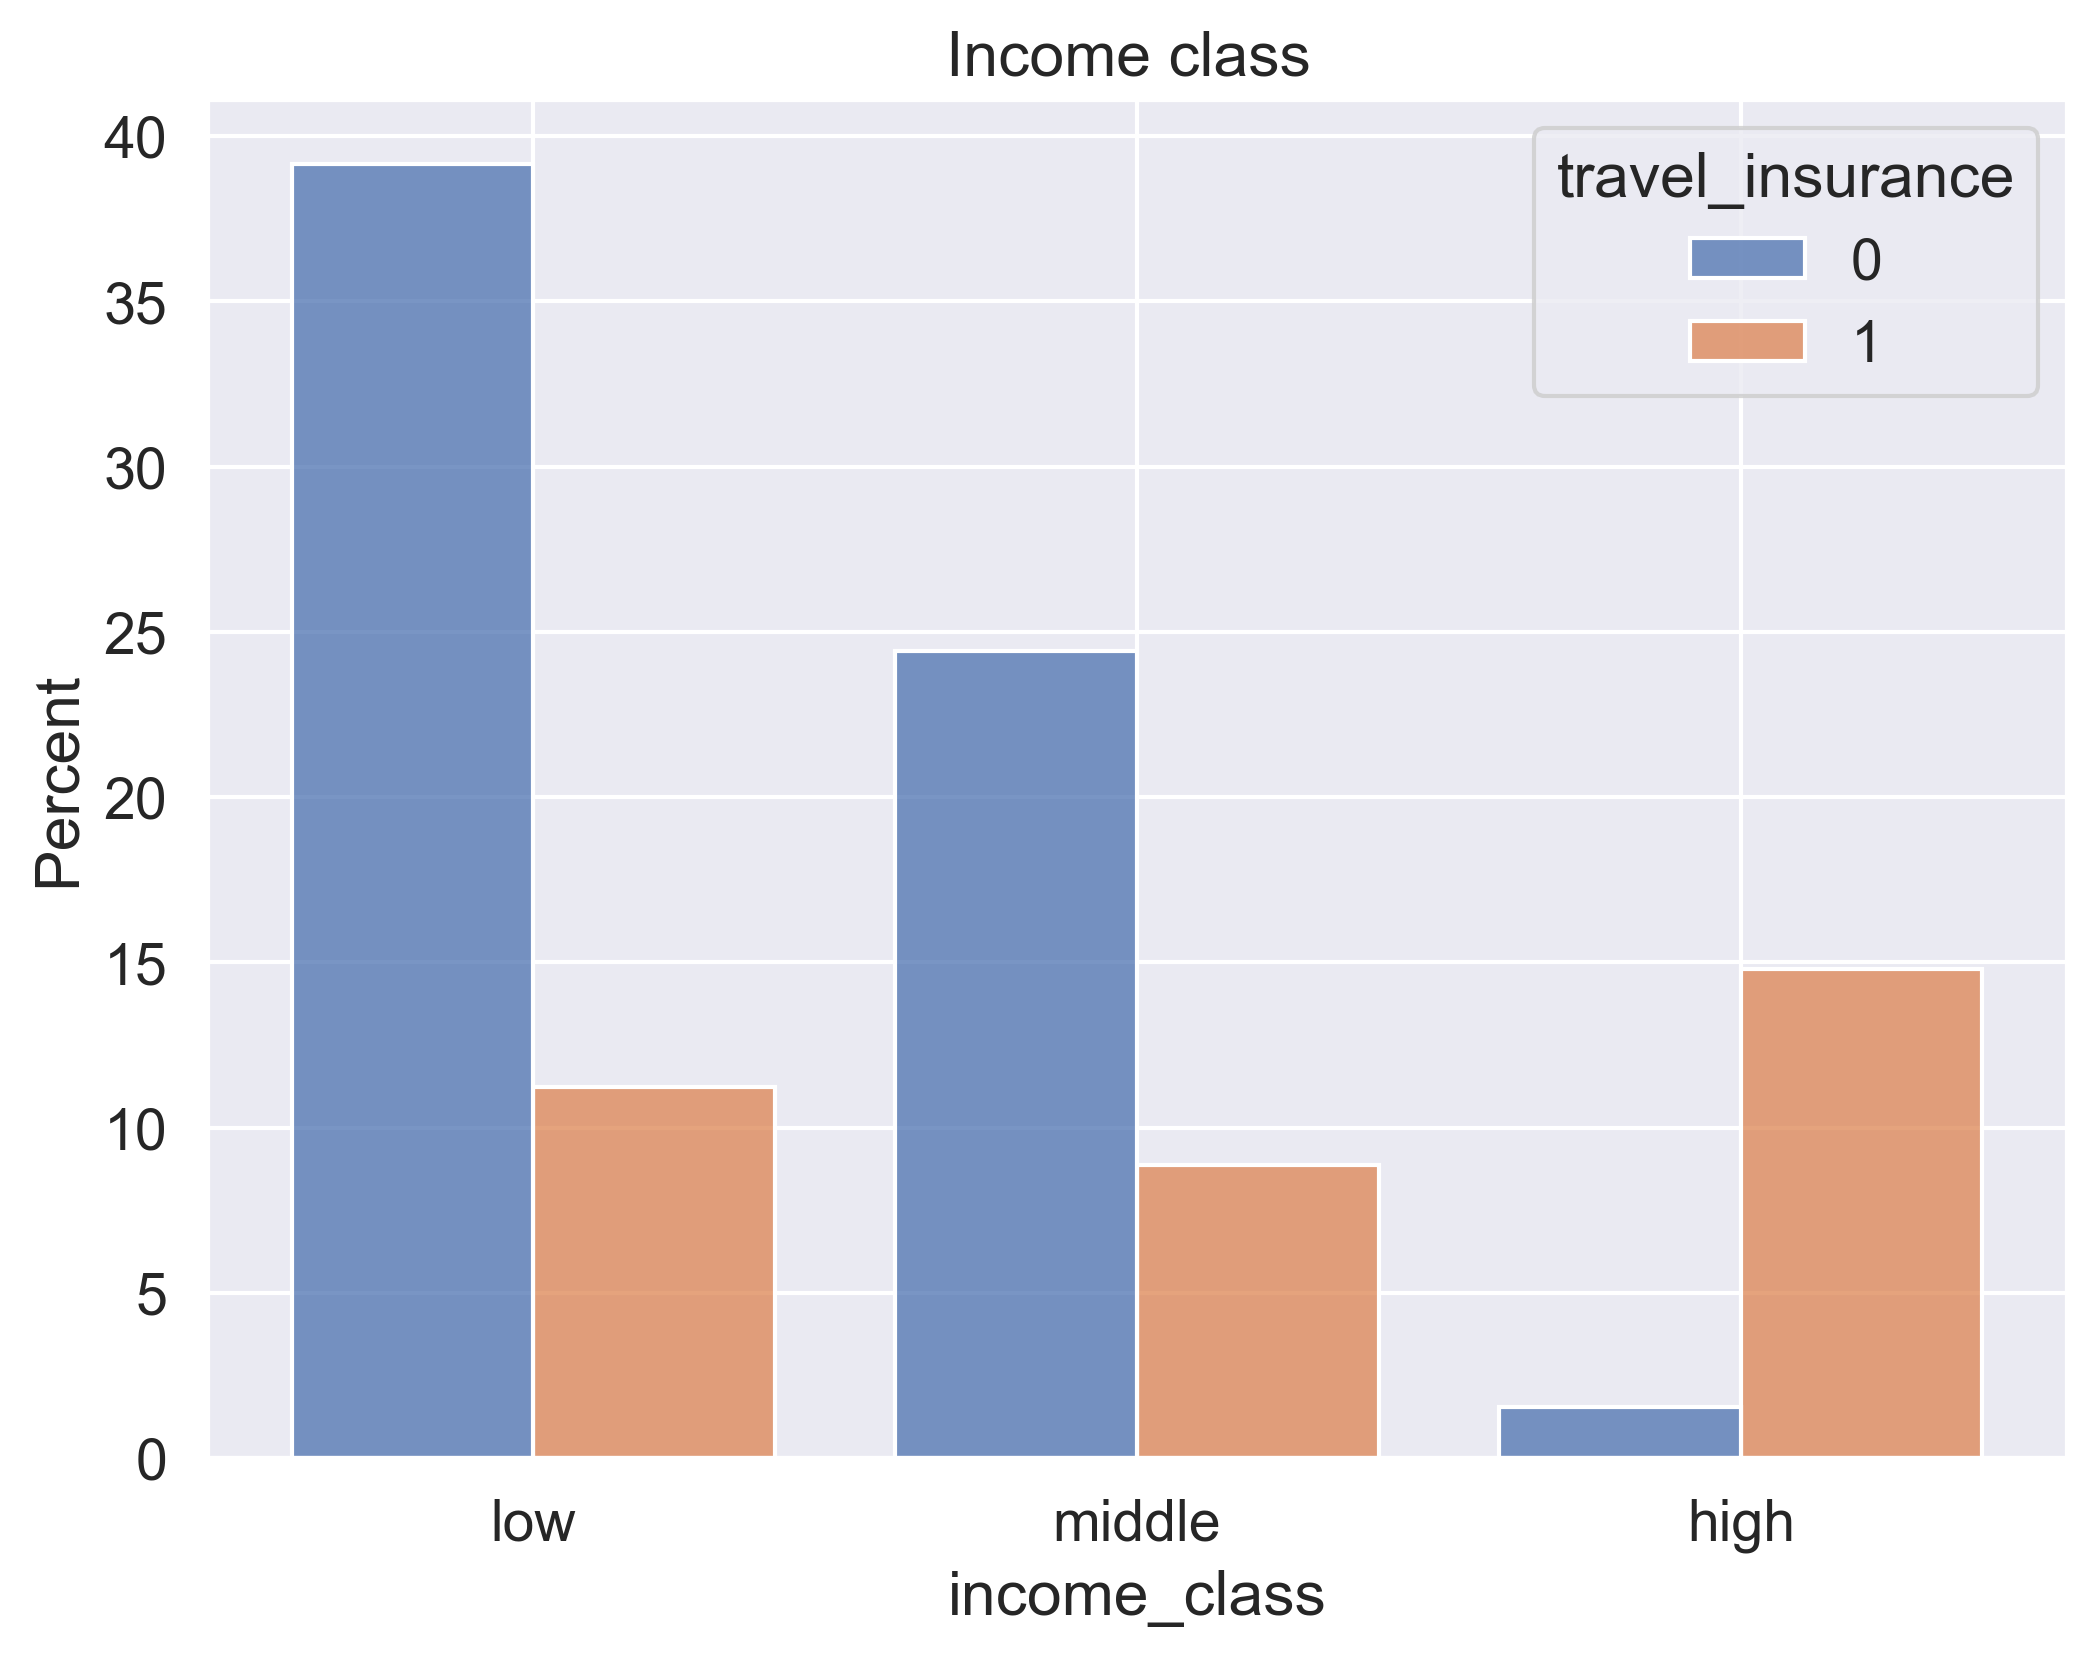

In [67]:
#creating a function to classify the data based on income 
def class_label (row):
   if row['annual_income']>0.75*df.annual_income.max() :
      return 'high'
   if (row['annual_income']<0.75*df.annual_income.max())&(row['annual_income']>0.5*df.annual_income.max()):
      return 'middle'
   if row['annual_income']<0.5*df.annual_income.max():
      return 'low'
# apply the function to create the new feature
df['income_class']=df.apply (lambda row: class_label(row), axis=1)
df['income_class'] = pd.Categorical(df['income_class'], ['low','middle','high'])

#displying the income class based on insurance 
plt.figure(figsize=(8,6), dpi=300)
sns.histplot(df, x="income_class", hue="travel_insurance", stat="percent", multiple="dodge", shrink=.8)
plt.title('Income class')

Text(0.5, 1.0, 'Family size')

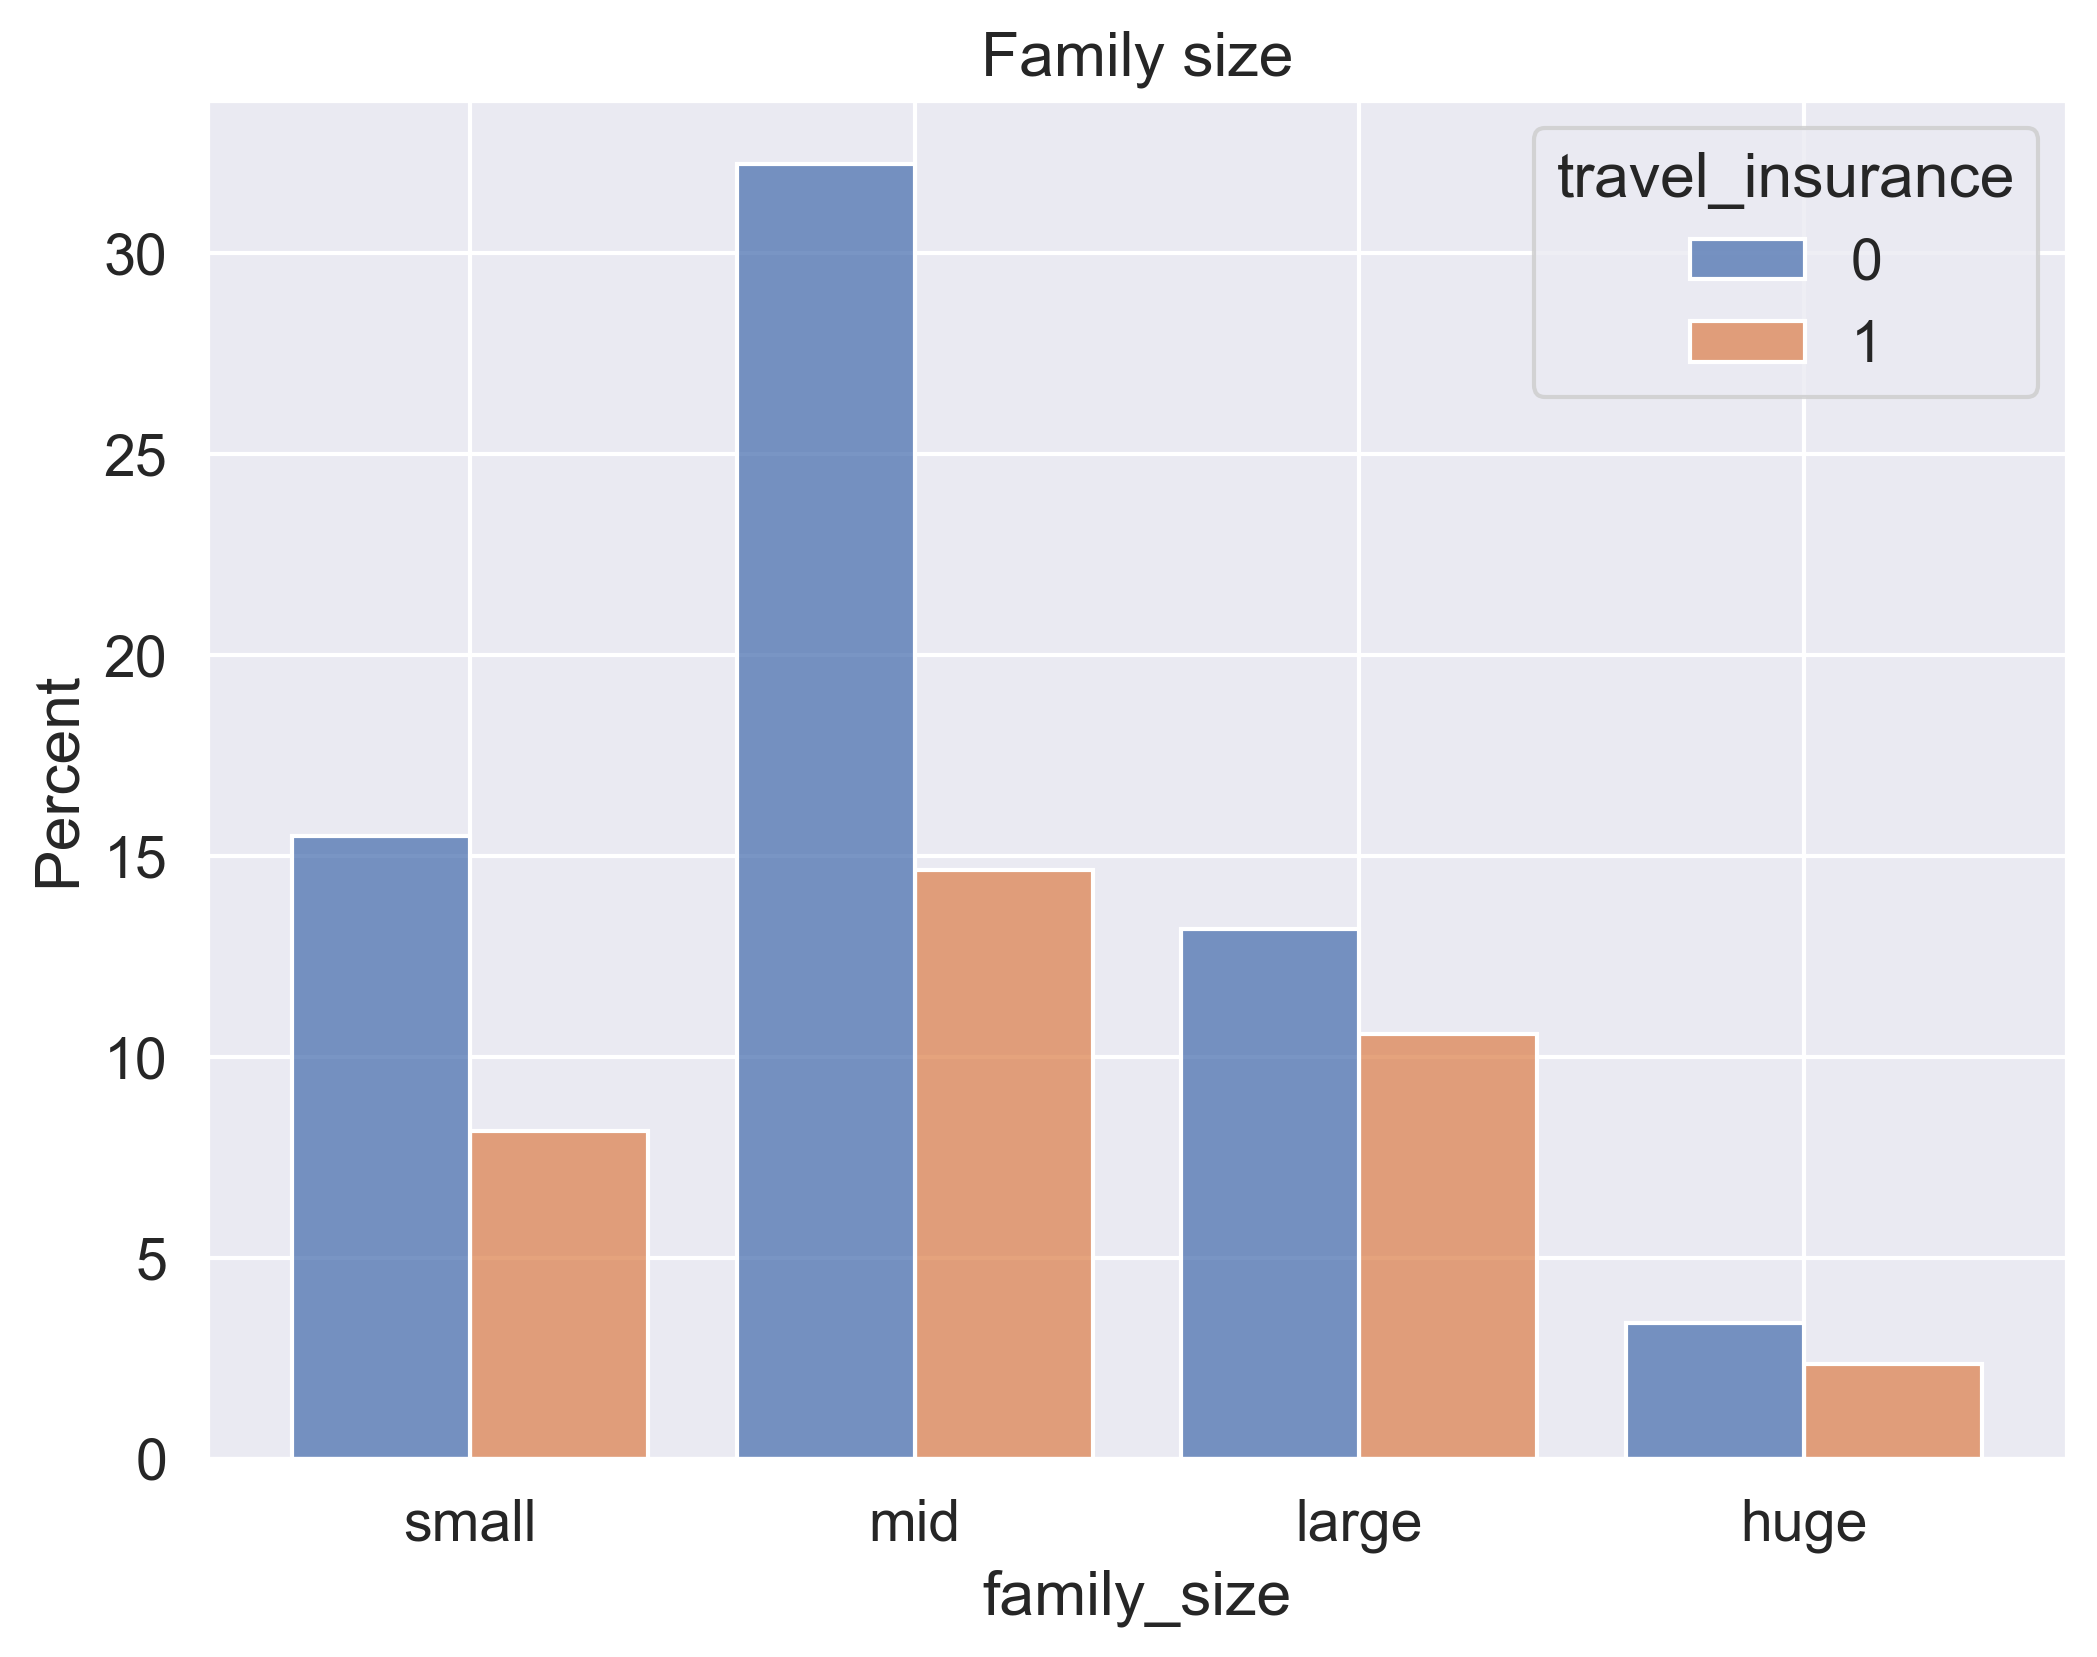

In [66]:
#creating a function to classify the data based on income 
def family_label (row):
   if row['family_members']>=8 :
      return 'huge'
   if (row['family_members']<8)&(row['family_members']>=6):
      return 'large'
   if (row['family_members']<6)&(row['family_members']>=4):
      return 'mid'
   if row['family_members']<4:
      return 'small'
# apply the function to create the new feature
df['family_size']=df.apply (lambda row: family_label(row), axis=1)
#creating order in the newly created column
df['family_size'] = pd.Categorical(df['family_size'], ['small','mid','large','huge'])

#displying the family size based on insurance 
plt.figure(figsize=(8,6), dpi=300)
sns.histplot(df, x="family_size", hue="travel_insurance", stat="percent", multiple="dodge",shrink=.8)
plt.title('Family size')

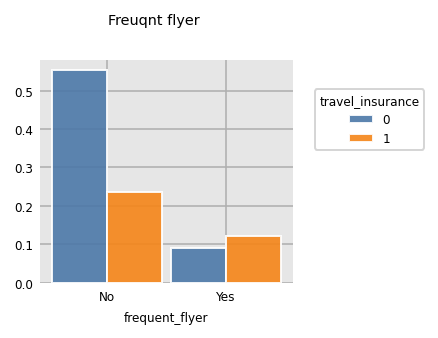

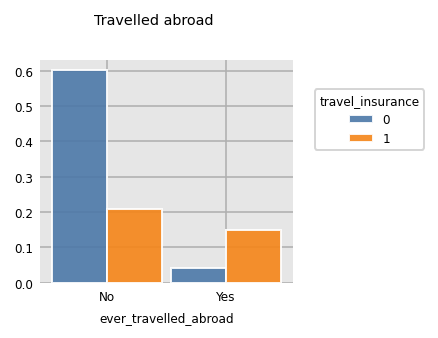

In [44]:
display(dxp.count('frequent_flyer', data=df,split='travel_insurance',normalize=True, title='Freuqnt flyer'))
display(dxp.count('ever_travelled_abroad', data=df,split='travel_insurance',normalize=True, title='Travelled abroad'))

### examining compination of interesting features such as income class, employment_type, travel history and frequncy of travel

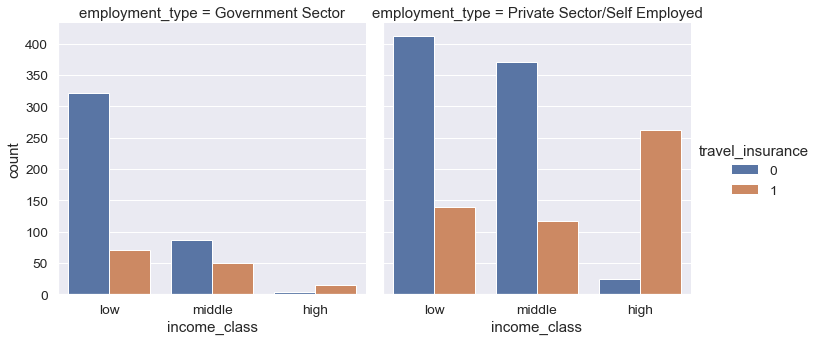

In [83]:
sns.catplot(data=df, x="income_class", hue="travel_insurance",col='employment_type',kind="count");

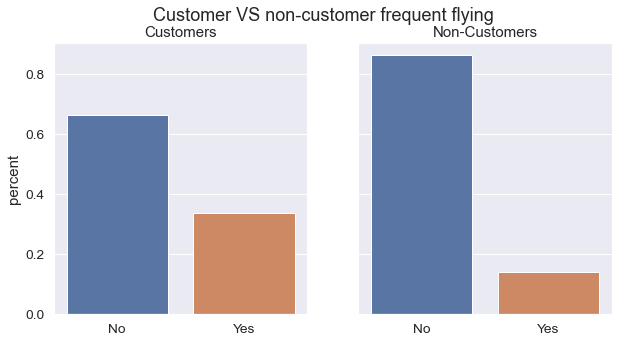

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
fig.suptitle('Customer VS non-customer frequent flying')
axes[0].set_title('Customers')
axes[1].set_title('Non-Customers')
sns.barplot(ax=axes[0],x=df_customer.frequent_flyer.value_counts().index,
            y=df_customer.frequent_flyer.value_counts(normalize=True))
sns.barplot(ax=axes[1],x=df_non_customer.frequent_flyer.value_counts().index,
            y=df_non_customer.frequent_flyer.value_counts(normalize=True))

axes[0].set_ylabel('percent');
axes[1].set_ylabel('');

##  What is the typical profile of customers and non-customers?
- the data shows that the typical profile of a customer is most luckily someone who has either travelled aboard or frequent flyer.
- the data also shows that travellers with annual income more than \$1.35M are most luckily to get insurance.
- the data shows that travellers younger than 27 or older than 32 tend to buy insurance, however the age group of 27 to 32 tend to not
- Families with more than 6 family members would buy insurance however families with less than 6 members will most luckily not be insured

## dividing the data into customer and non-customer based on travel insurance

In [69]:
# using travel_insurance to devide the data
df_customer=df[df.travel_insurance==1].reset_index(drop=True)
df_non_customer=df[df.travel_insurance==0].reset_index(drop=True)
print('the data hase {} customers'.format(df_customer.shape[0]))
print('the data hase {} non-customers'.format(df_non_customer.shape[0]))

the data hase 710 customers
the data hase 1277 non-customers


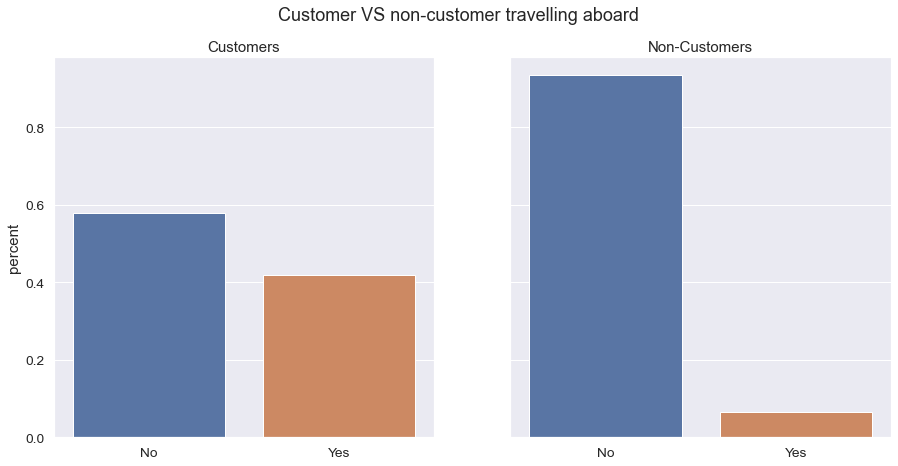

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
fig.suptitle('Customer VS non-customer travelling aboard')
axes[0].set_title('Customers')
axes[1].set_title('Non-Customers')
sns.barplot(ax=axes[0],x=df_customer.ever_travelled_abroad.value_counts().index,
            y=df_customer.ever_travelled_abroad.value_counts(normalize=True))
sns.barplot(ax=axes[1],x=df_non_customer.ever_travelled_abroad.value_counts().index,
            y=df_non_customer.ever_travelled_abroad.value_counts(normalize=True))

axes[0].set_ylabel('percent');
axes[1].set_ylabel('');

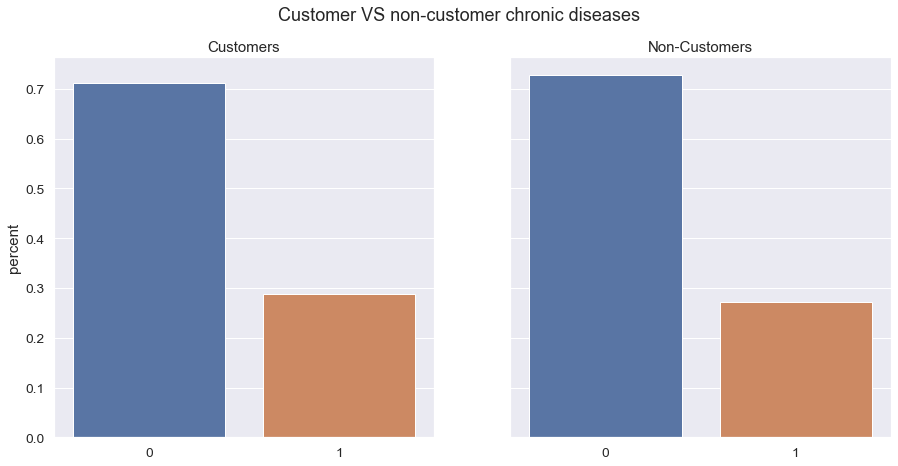

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
fig.suptitle('Customer VS non-customer chronic diseases')
axes[0].set_title('Customers')
axes[1].set_title('Non-Customers')
sns.barplot(ax=axes[0],x=df_customer.chronic_diseases.value_counts().index,
            y=df_customer.chronic_diseases.value_counts(normalize=True))
sns.barplot(ax=axes[1],x=df_non_customer.chronic_diseases.value_counts().index,
            y=df_non_customer.chronic_diseases.value_counts(normalize=True))

axes[0].set_ylabel('percent');
axes[1].set_ylabel('');

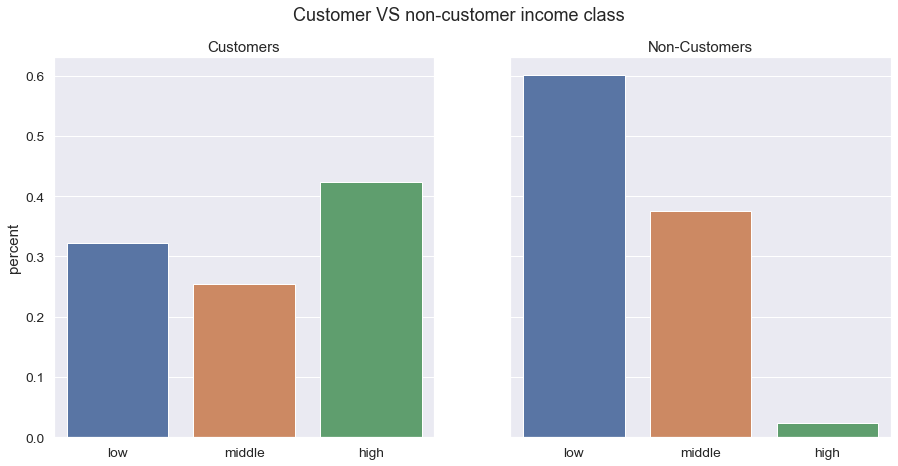

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(15,7), sharey=True)
fig.suptitle('Customer VS non-customer income class');
axes[0].set_title('Customers');
axes[1].set_title('Non-Customers');
sns.barplot(ax=axes[0],x=df_customer.income_class.value_counts().index,
            y=df_customer.income_class.value_counts(normalize=True))
sns.barplot(ax=axes[1],x=df_non_customer.income_class.value_counts().index,
            y=df_non_customer.income_class.value_counts(normalize=True))

axes[0].set_ylabel('percent');
axes[1].set_ylabel('');

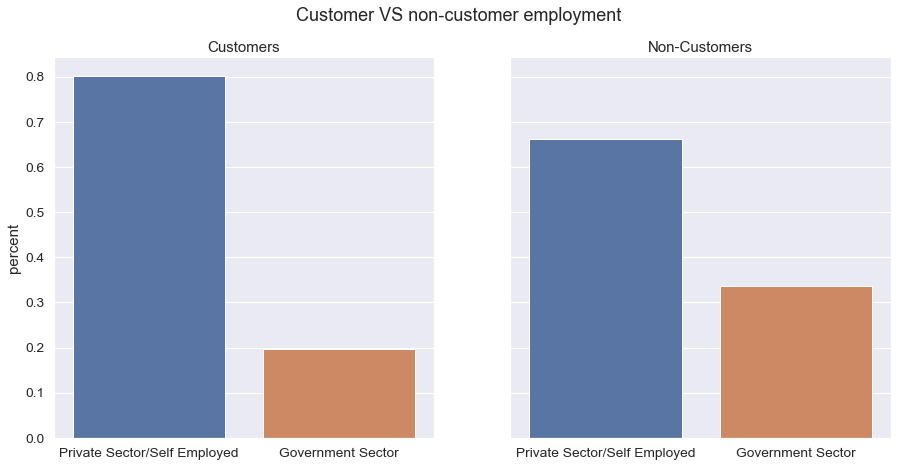

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)
fig.suptitle('Customer VS non-customer employment')
axes[0].set_title('Customers')
axes[1].set_title('Non-Customers')
sns.barplot(ax=axes[0],x=df_customer.employment_type.value_counts().index,
            y=df_customer.employment_type.value_counts(normalize=True))
sns.barplot(ax=axes[1],x=df_non_customer.employment_type.value_counts().index,
            y=df_non_customer.employment_type.value_counts(normalize=True))

axes[0].set_ylabel('percent');
axes[1].set_ylabel('');

## Are there differences in the travel habits between customers and non-customers?
### customers' habits:
- they may have already travelled abroad
- 


### non-customers' habits:
- the mojority has never travelled abroad
- the mojority is low income class

##### having a chronical disease does not have a strong effect on buying a travel insurance